# Mimicry and Wordle with class

Mimicry is a biology phenomenon that empowers some animals to copy their appearance so that they appears like predators or blend within their environment. For example, the colours and patterns of their outer skin or the shape of their body.

Mimicry has inspired computer scientists to formulate some discrete problems to explore computations and algorithm design.

# Libraries

In [39]:
from random import * 
from datetime import * 
import string 
import matplotlib.pyplot as plt
import math

In [37]:

def gen_bitstring(n:int) -> list:
    seed(datetime.now())
    return[round(random()) for i in range(n)]

gen_bitstring(3)

[0, 0, 0]

In [40]:
def gen_charstring(n:int) -> list:
    seed(datetime.now())
    return[choice(string.ascii_lowercase) for i in range(n)]

gen_charstring(3)

['a', 'f', 'j']

# Mimicry problem

## Bit-string

### Problem definition
The purpose of the Mimicry problem is to imitate a pattern of bits, so that two bitstrings become identical.

### Possible data structure
 - A bit is 0 or 1.
 - a bitstring is a one-dimentional array made of bits

### Variables
- One prototype : A constant bitstring that is only known by the generator
- One imitator  : A bitstring that is attempting to find the same patterns 

In [3]:
prototype: list = [0,1,0,1,0]
imitator : list = [0,0,0,0,0]

### How many bits are incorrectly? (the Hamming distance)

Hamming distance : 2

The bits that are the same are at position 1,3,5

In [4]:
def find_hamming_dist(prototype: list, imitator : list) -> int:
    """
    calculates number of similar bit between two bitstrings
    
    pre-conditions : both lists have n elements and n > 0
    Postcondition  : Count the number of element of both strings that are the not same
    """
    # find length
    length_bitstrings: int = len(prototype)
    indices          : list = range(0, length_bitstrings)
    
    # number of elements correct
    total_incorrect = 0
    
    # count
    for index in indices:
        if prototype[index] != imitator[index]:
            total_incorrect += 1
            
    return total_incorrect

In [5]:
prototype

[0, 1, 0, 1, 0]

In [6]:
# All correct - same as prototype
case_1 : list = [0,1,0,1,0]
expected_dist = 0
test_dist     = find_hamming_dist(prototype, case_1)
print("case 1 met ", test_dist == expected_dist)


case 1 met  True


In [7]:
# All incorrect - all different as prototype
case_2 : list = [1,0,1,0,1]
expected_dist = 5
test_dist     = find_hamming_dist(prototype, case_2)
print("case 2 met ", test_dist == expected_dist)

case 2 met  True


In [8]:
# some different bits - the first element
case_3 : list = [1,1,0,1,0]
expected_dist = 1
test_dist     = find_hamming_dist(prototype, case_3)
print("case 3 met ", test_dist == expected_dist)

case 3 met  True


In [9]:
# some different bits - the last element
case_4 : list = [0,1,0,1,1]
expected_dist = 1
test_dist     = find_hamming_dist(prototype, case_4)
print("case 4 met ", test_dist == expected_dist)

case 4 met  True


In [10]:
# some different bits - two bits incorrect in the middle
case_5 : list = [0,0,1,1,0]
expected_dist = 2
test_dist     = find_hamming_dist(prototype, case_5)
print("case 5 met ", test_dist == expected_dist)

case 5 met  True


### Let's test with some randomly generated list


In [11]:
%%time
n = 10
prototype = gen_bitstring(n)
imitator  = gen_bitstring(n)
find_hamming_dist(prototype, imitator)


CPU times: user 91 µs, sys: 36 µs, total: 127 µs
Wall time: 137 µs


7

In [12]:
%%time
n = 100
prototype = gen_bitstring(n)
imitator  = gen_bitstring(n)
find_hamming_dist(prototype, imitator)


CPU times: user 90 µs, sys: 36 µs, total: 126 µs
Wall time: 132 µs


52

### Test the Hamming distance

In [13]:
%%time
n = 1000
prototype = gen_bitstring(n)
imitator  = gen_bitstring(n)
find_hamming_dist(prototype, imitator)


CPU times: user 988 µs, sys: 0 ns, total: 988 µs
Wall time: 1 ms


492

In [14]:
%%time
n = 10000
prototype = gen_bitstring(n)
imitator  = gen_bitstring(n)
find_hamming_dist(prototype, imitator)


CPU times: user 9.02 ms, sys: 0 ns, total: 9.02 ms
Wall time: 8.85 ms


5072

In [15]:
%%time
n = int(1e5)
prototype = gen_bitstring(n)
imitator  = gen_bitstring(n)
find_hamming_dist(prototype, imitator)


CPU times: user 41.3 ms, sys: 2.02 ms, total: 43.4 ms
Wall time: 42.7 ms


50178

In [16]:
%%time
n = int(1e6)
prototype = gen_bitstring(n)
imitator  = gen_bitstring(n)
find_hamming_dist(prototype, imitator)


CPU times: user 403 ms, sys: 46.1 ms, total: 449 ms
Wall time: 464 ms


500455

In [17]:
%%time
n = int(1e7)
prototype = gen_bitstring(n)
imitator  = gen_bitstring(n)
find_hamming_dist(prototype, imitator)


CPU times: user 3.72 s, sys: 240 ms, total: 3.96 s
Wall time: 3.99 s


5000614

### Complexity

n <-- length of bitstring

__Initialisation of variables:__ 2n + 1
 
    length_bitstrings: int = len(prototype)

Counting the element of a one-dimentional array is n the number of elements.

    indices          : list = range(0, length_bitstrings)
    
 Generating a one-dimensional array is also linear with the length of the elementso it is too.
 
    total_incorrect = 0

it is constant: 1

__Iteration:__ 2n


    for index in indices:
        if prototype[index] == imitator[index]:
            total_correct += 1
            
1. _Iterating through each indices:_
        - bitstring of length 1 --> 1
        - bitstring of length > 1 --> n > 1 and n == length(bit_string)
    So we assume it n

2. _Comparison:_
        - One count for each iteration. 
    So we assume n
3. _sum:_
    - minimum: if no element are the same   --> length of the bit string
    - maximum: if all elements are the same --> 0
    So we assume it is in the range [0,n]
    
__Big theta__
It is linear. As n increases, the complexity increase constantly.

$\theta(min: 4n + 1, max: 5n + 1)$

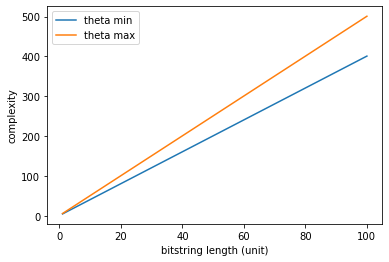

In [18]:
n    :list = [i   for i in range(1,101,1)]
min_y:list = [4*i + 1 for i in range(1,101,1)]
max_y:list = [5*i + 1 for i in range(1,101,1)]    
plt.plot(n,min_y)
plt.plot(n,max_y)
plt.xlabel("bitstring length (unit)")
plt.ylabel("complexity")
plt.legend(["theta min", "theta max"])
plt.show()

### Hamming distance version 2

In [19]:
def find_hamming_dist(prototype: list, imitator : list) -> int:
    """
    calculates number of similar bit between two bitstrings
    
    pre-conditions : both lists have n elements and n > 0
    Postcondition  : Count the number of element of both strings that are the same
    """
    # find length
    length_bitstrings: int = len(prototype)
    indices          : list = range(0, length_bitstrings)
    
    # number of elements correct
    total_incorrect = 0
    
    # count
    for index in indices:
        total_incorrect += abs(prototype[index] - imitator[index])
            
    return total_incorrect

### Testing 

In [20]:
prototype: list = [0,1,0,1,0]
imitator : list = [0,0,0,0,0]

In [21]:
prototype

[0, 1, 0, 1, 0]

In [22]:
# All correct - same as prototype
case_1 : list = [0,1,0,1,0]
expected_dist = 0
test_dist     = find_hamming_dist(prototype, case_1)
print("case 1 met ", test_dist == expected_dist)


case 1 met  True


In [23]:
# All incorrect - all different as prototype
case_2 : list = [1,0,1,0,1]
expected_dist = 5
test_dist     = find_hamming_dist(prototype, case_2)
print("case 2 met ", test_dist == expected_dist)

case 2 met  True


In [24]:
# some different bits - the first element
case_3 : list = [1,1,0,1,0]
expected_dist = 1
test_dist     = find_hamming_dist(prototype, case_3)
print("case 3 met ", test_dist == expected_dist)

case 3 met  True


In [25]:
# some different bits - the last element
case_4 : list = [0,1,0,1,1]
expected_dist = 1
test_dist     = find_hamming_dist(prototype, case_4)
print("case 4 met ", test_dist == expected_dist)

case 4 met  True


In [26]:
# some different bits - two bits incorrect in the middle
case_5 : list = [0,0,1,1,0]
expected_dist = 2
test_dist     = find_hamming_dist(prototype, case_5)
print("case 5 met ", test_dist == expected_dist)

case 5 met  True


### Let's test with some randomly generated list


In [27]:
%%time
n = 10
prototype = gen_bitstring(n)
imitator  = gen_bitstring(n)
find_hamming_dist(prototype, imitator)


CPU times: user 158 µs, sys: 19 µs, total: 177 µs
Wall time: 187 µs


4

In [28]:
%%time
n = 100
prototype = gen_bitstring(n)
imitator  = gen_bitstring(n)
find_hamming_dist(prototype, imitator)


CPU times: user 261 µs, sys: 0 ns, total: 261 µs
Wall time: 294 µs


56

### Test the Hamming distance

In [29]:
%%time
n = 1000
prototype = gen_bitstring(n)
imitator  = gen_bitstring(n)
find_hamming_dist(prototype, imitator)


CPU times: user 1.33 ms, sys: 0 ns, total: 1.33 ms
Wall time: 1.35 ms


503

In [30]:
%%time
n = 10000
prototype = gen_bitstring(n)
imitator  = gen_bitstring(n)
find_hamming_dist(prototype, imitator)


CPU times: user 10.1 ms, sys: 14 µs, total: 10.1 ms
Wall time: 9.88 ms


4979

In [31]:
%%time
n = int(1e5)
prototype = gen_bitstring(n)
imitator  = gen_bitstring(n)
find_hamming_dist(prototype, imitator)


CPU times: user 51.4 ms, sys: 939 µs, total: 52.3 ms
Wall time: 51.8 ms


49733

In [32]:
%%time
n = int(1e6)
prototype = gen_bitstring(n)
imitator  = gen_bitstring(n)
find_hamming_dist(prototype, imitator)


CPU times: user 432 ms, sys: 21.8 ms, total: 453 ms
Wall time: 463 ms


499880

In [33]:
%%time
n = int(1e7)
prototype = gen_bitstring(n)
imitator  = gen_bitstring(n)
find_hamming_dist(prototype, imitator)


CPU times: user 4.24 s, sys: 255 ms, total: 4.5 s
Wall time: 4.53 s


4996080

### Complexity

n <-- length of bitstring

__Initialisation of variables:__ 2n + 1
 
    length_bitstrings: int = len(prototype)

Counting the element of a one-dimentional array is n the number of elements.

    indices          : list = range(0, length_bitstrings)
    
 Generating a one-dimensional array is also linear with the length of the elementso it is too.
 
    total_incorrect = 0

it is constant: 1

__Iteration:__ 4n


    for index in indices:
        if prototype[index] == imitator[index]:
            total_correct += 1
            
1. _Iterating through each indices:_
        - bitstring of length 1 --> 1
        - bitstring of length > 1 --> n > 1 and n == length(bit_string)
    So we assume it n

3. _sum:_
    - difference: one for each element --> n
    - absolution value: one for each element --> n
    - sum: one for each element --> n
   So we assume 3n
    
__Big theta__
It is linear. As n increases, the complexity increase constantly.

$\theta(min: 6n + 1, max: 6n + 1)$

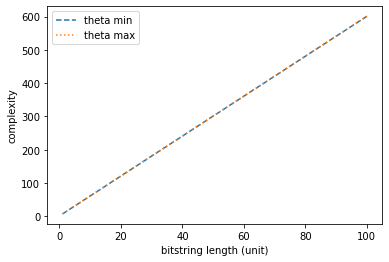

In [34]:
n    :list = [i   for i in range(1,101,1)]
min_y:list = [6*i + 1 for i in range(1,101,1)]
max_y:list = [6*i + 1 for i in range(1,101,1)]    
plt.plot(n,min_y, linestyle = 'dashed')
plt.plot(n,max_y, linestyle = 'dotted')
plt.xlabel("bitstring length (unit)")
plt.ylabel("complexity")
plt.legend(["theta min", "theta max"])
plt.show()

## character string - Wordle inspired example

### Problem definition
The purpose of the wordle is to guess a word from given clue, so that a imitator word imitates a pattern of characters, so that two character strings become identical.

### Possible data structure
 - A lower case is represented with ASCII values in the range between 97 to 122
 - a charstring is a one-dimentional array made of lower cases

### Variables
- One prototype : A constant character string that is only known by the generator
- One imitator  : A character string that is attempting to find the same patternS 

In [41]:
prototype: list = ['a','s','c','i','i']
imitator : list = ['b','t','d','j','j']

### How many characters are incorrect? (the Hamming distance)

Hamming distance : 5


In [42]:
def find_hamming_dist(prototype: list, imitator : list) -> int:
    """
    calculates number of similar bit between two bitstrings
    
    pre-conditions : both lists have n elements and n > 0
    Postcondition  : Count the number of element of both strings that are the not same
    """
    # find length
    length_bitstrings: int = len(prototype)
    indices          : list = range(0, length_bitstrings)
    
    # number of elements correct
    total_incorrect = 0
    
    # count
    for index in indices:
        if prototype[index] != imitator[index]:
            total_incorrect += 1
            
    return total_incorrect

In [46]:
prototype

['a', 's', 'c', 'i', 'i']

In [44]:
# All correct - same as prototype
case_1 : list = ['a','s','c','i','i']
expected_dist = 0
test_dist     = find_hamming_dist(prototype, case_1)
print("case 1 met ", test_dist == expected_dist)


case 1 met  True


In [47]:
# All incorrect - all different as prototype
case_2 : list = ['b','t','d','j','j']
expected_dist = 5
test_dist     = find_hamming_dist(prototype, case_2)
print("case 2 met ", test_dist == expected_dist)

case 2 met  True


In [8]:
# some different bits - the first element
case_3 : list = ['e','s','c','i','i']
expected_dist = 1
test_dist     = find_hamming_dist(prototype, case_3)
print("case 3 met ", test_dist == expected_dist)

case 3 met  True


In [9]:
# some different bits - the last element
case_4 : list = ['a','s','c','i','e']
expected_dist = 1
test_dist     = find_hamming_dist(prototype, case_4)
print("case 4 met ", test_dist == expected_dist)

case 4 met  True


In [49]:
# some different bits - two bits incorrect in the middle
case_5 : list = ['a','e','l','i','i']
expected_dist = 2
test_dist     = find_hamming_dist(prototype, case_5)
print("case 5 met ", test_dist == expected_dist)

case 5 met  True


### Let's test with some randomly generated list


In [50]:
%%time
n = 10
prototype = gen_charstring(n)
imitator  = gen_charstring(n)
find_hamming_dist(prototype, imitator)


CPU times: user 153 µs, sys: 16 µs, total: 169 µs
Wall time: 179 µs


9

In [51]:
%%time
n = 100
prototype = gen_charstring(n)
imitator  = gen_charstring(n)
find_hamming_dist(prototype, imitator)


CPU times: user 410 µs, sys: 0 ns, total: 410 µs
Wall time: 421 µs


94

### Test the Hamming distance

In [52]:
%%time
n = 1000
prototype = gen_charstring(n)
imitator  = gen_charstring(n)
find_hamming_dist(prototype, imitator)


CPU times: user 3.35 ms, sys: 0 ns, total: 3.35 ms
Wall time: 3.22 ms


963

In [53]:
%%time
n = 10000
prototype = gen_charstring(n)
imitator  = gen_charstring(n)
find_hamming_dist(prototype, imitator)


CPU times: user 13.6 ms, sys: 963 µs, total: 14.5 ms
Wall time: 14 ms


9605

In [54]:
%%time
n = int(1e5)
prototype = gen_charstring(n)
imitator  = gen_charstring(n)
find_hamming_dist(prototype, imitator)


CPU times: user 91.8 ms, sys: 2.07 ms, total: 93.9 ms
Wall time: 92.7 ms


96082

In [55]:
%%time
n = int(1e6)
prototype = gen_charstring(n)
imitator  = gen_charstring(n)
find_hamming_dist(prototype, imitator)


CPU times: user 882 ms, sys: 8.59 ms, total: 890 ms
Wall time: 892 ms


960983

In [56]:
%%time
n = int(1e7)
prototype = gen_charstring(n)
imitator  = gen_charstring(n)
find_hamming_dist(prototype, imitator)


CPU times: user 8.77 s, sys: 121 ms, total: 8.89 s
Wall time: 8.92 s


9615534

### Complexity

n <-- length of bitstring

__Initialisation of variables:__ 2n + 1
 
    length_bitstrings: int = len(prototype)

Counting the element of a one-dimentional array is n the number of elements.

    indices          : list = range(0, length_bitstrings)
    
 Generating a one-dimensional array is also linear with the length of the elementso it is too.
 
    total_incorrect = 0

it is constant: 1

__Iteration:__ 2n


    for index in indices:
        if prototype[index] == imitator[index]:
            total_correct += 1
            
1. _Iterating through each indices:_
        - bitstring of length 1 --> 1
        - bitstring of length > 1 --> n > 1 and n == length(bit_string)
    So we assume it n

2. _Comparison:_
        - One count for each iteration. 
    So we assume n
3. _sum:_
    - minimum: if no element are the same   --> length of the bit string
    - maximum: if all elements are the same --> 0
    So we assume it is in the range [0,n]
    
__Big theta__
It is linear. As n increases, the complexity increase constantly.

$\theta(min: 4n + 1, max: 5n + 1)$

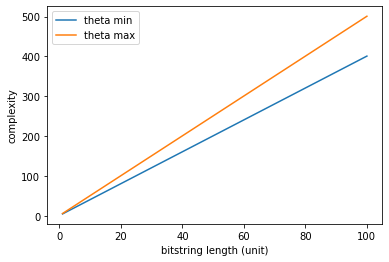

In [58]:
n    :list = [i   for i in range(1,101,1)]
min_y:list = [4*i + 1 for i in range(1,101,1)]
max_y:list = [5*i + 1 for i in range(1,101,1)]    
plt.plot(n,min_y)
plt.plot(n,max_y)
plt.xlabel("bitstring length (unit)")
plt.ylabel("complexity")
plt.legend(["theta min", "theta max"])
plt.show()

### Wordle - How many letters did I get right?

We use the most efficient Hamming distance algorithm 

In [5]:
def find_hamming_dist(prototype: list, imitator : list) -> int:
    """
    calculates number of similar bit between two bitstrings
    
    pre-conditions : both lists have n elements and n > 0
    Postcondition  : Count the number of element of both strings that are the not same
    """
    # find length
    length_bitstrings: int = len(prototype)
    indices          : list = range(0, length_bitstrings)
    
    # number of elements correct
    total_incorrect = 0
    
    # count
    for index in indices:
        if prototype[index] != imitator[index]:
            total_incorrect += 1
            
    return total_incorrect

In [6]:
def count_correct_letters(prototype: list, imitator : list) -> int:
    """
    Identify the number of correct characters using the Hamming distance
    pre-conditions : both lists have n elements and n > 0
    Postcondition  : Count the number of element of both strings that are the same
    """
    return len(prototype) - find_hamming_dist(prototype, imitator)

In [8]:
hidden_word  = ['h','a','p','p','y']
guessed_word = ['h','i','p','p','y']
print("number of correct letters: ",
      count_correct_letters(hidden_word, guessed_word))

number of correct letters:  4


## Wordle - which letters are correctly chosen?


Transform the list into a sets. Remember sets have no duplicated values and are ordered. Then identify correct letters using the _intersection_ operator. 

In [9]:
hidden_word_set = set(hidden_word)
hidden_word_set

{'a', 'h', 'p', 'y'}

In [11]:
guessed_word_set = set(guessed_word)
guessed_word_set

{'h', 'i', 'p', 'y'}

In [13]:
hidden_word_set.intersection(guessed_word_set)

{'h', 'p', 'y'}

# Let's define a class for wordle 

In [39]:
from random import * 
from datetime import * 
class wordle:
    """
    A class that simulate wordle using a hidden word randomly
    generated. It is not called gibbership wordle
    """
    
    def __init__(self, length:int):
        self.__prototype = []
        self.__indices = range(0, length-1)
        self.length = length
        self.imitator = []
        self.__count = 0
        self.__max_count = 5
    def generate_word(self):
        seed(datetime.now())
        indices = range(0,self.length)
        for index in self.__indices:
            self.__prototype.append(chr(randint(97,122))) 
    def set_imitator(self,guessed_word):
        if (len(guessed_word) == self.length):
            self.imitator = guessed_word
            self.__count+= 1;
    def get_no_correct(self) -> int:
        total_correct = 0
        for index in self.__indices:
            if self.__prototype[index] == self.imitator[index]:
                total_correct += 1
        return total_correct
    def get_count_left(self) -> int:
        return self.__max_count - self.__count;
    def get_correct_letters(self) -> {}:
        prototype = set(self.__prototype)
        imitator  = set(self.imitator)
        return prototype.intersection(imitator)
    def get_answer(self) -> []:
        if self.__count == self.__max_count:
            return self.__prototype

In [40]:
case_1 = wordle(5)
case_1.generate_word()
case_1.set_imitator(['h','a','p','p','y'])
case_1.get_no_correct()

0

In [41]:
case_1.get_count_left()

4

In [43]:
case_1.set_imitator(['h','a','p','p','y'])
case_1.set_imitator(['h','a','p','p','y'])
case_1.set_imitator(['h','a','p','p','y'])
case_1.set_imitator(['h','a','p','p','y'])
case_1.get_answer()

In [44]:
case_1.get_correct_letters()

set()